$$ \boldsymbol{\ddot{r}}=-\gamma \left(\frac{M}{r^3}\boldsymbol{r}-\frac{S}{\rho^3}\rho+\frac{S}{R^3}R\right) $$

$$ \ddot{R}=-\gamma\frac{M+S}{R^3}{R} $$

In [245]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from IPython.html.widgets import interact, fixed

In [246]:
gamma=4.5e-8 #kpc^3/(SolarMass)(age^2) age=10^8 years

In [247]:
def derivs(Rrv,t,M,S):
    rx,ry,vx,vy,Rx,Ry,Vx,Vy=tuple(Rrv)

    r=np.sqrt(rx**2+ry**2)
    R=np.sqrt(Rx**2+Ry**2)
    rhox=Rx-rx
    rhoy=Ry-ry
    rho=np.sqrt(rhox**2+rhoy**2)
 
    drx = vx
    dry = vy
    dvx = -gamma*(M*rx/(r**3)-S*rhox/(rho**3)+S*Rx/(R**3))
    dvy = -gamma*(M*ry/(r**3)-S*rhoy/(rho**3)+S*Ry/(R**3))
    dRx = Vx
    dRy = Vy
    dVx = -gamma*(M+S)*Rx/(R**3)
    dVy = -gamma*(M+S)*Ry/(R**3)
    return np.array([drx,dry,dvx,dvy,dRx,dRy,dVx,dVy])

In [248]:
derivs(np.array([1,3,2,4,5,7,6,8]),10,10,10)

array([  2.00000000e+00,   4.00000000e+00,  -7.82111694e-09,
        -3.76954385e-08,   6.00000000e+00,   8.00000000e+00,
        -7.06911317e-09,  -9.89675843e-09])

In [249]:
derivs(np.random.rand(8), 0.0, 1.0e4, 1.0e4)

array([  4.74004458e-02,   2.08501661e-01,  -1.68391414e-04,
        -3.32242436e-03,   2.76001268e-01,   6.29528408e-02,
        -1.86798544e-03,  -7.45420994e-04])

In [265]:
def star_ic(M,radii,n):
    ic=[]
    for i in range(len(radii)):
        r=radii[i]
        N=n[i]
        theta=np.linspace(0,2*np.pi,N)
        for j in range(N):
            x=r*np.cos(theta[j])
            y=r*np.sin(theta[j])
            v=np.sqrt(gamma*M/r)
            dx=v*np.sin(theta[j])
            dy=-v*np.cos(theta[j])
            ic.append(np.array([x,y,dx,dy]))
    return ic

In [266]:
a=star_ic(1.0e11,[.2*25,.4*25,.6*25],[12,20,30])

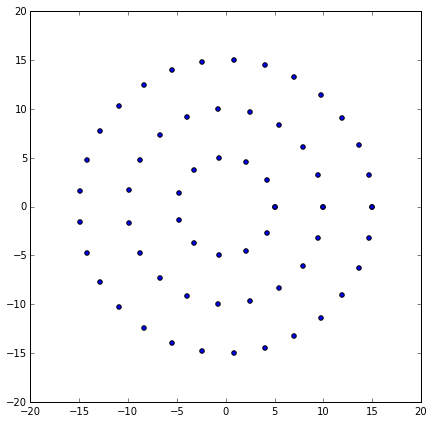

In [267]:
x=[i[0] for i in a]
y=[i[1] for i in a]
plt.figure(figsize=(7,7))
plt.scatter(x,y);

In [268]:
def S_ic(y,r0,M,S):
    x=-y**2/(4*r0)+r0
    v=np.sqrt(2.0*gamma*(M+S)/np.sqrt(x**2+y**2))
    a=np.arctan(2*r0/y)
    vx=v*np.cos(a)
    vy=-v*np.sin(a)
    return np.array([x,y,vx,vy])

In [269]:
b=S_ic(75.0, 25.0, 1.0e11, 1.0e11)

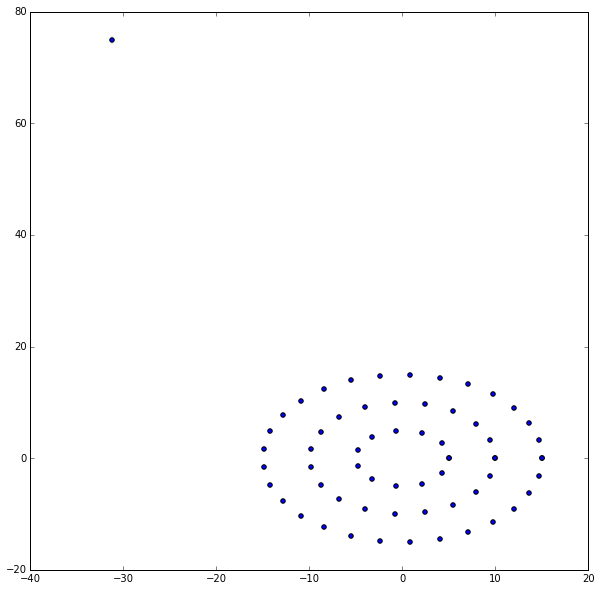

In [270]:
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.scatter(b[0],b[1]);

In [271]:
def solve_one_star(ics, icg, M, S, tmax, ntimes):
    t = np.linspace(0, tmax, ntimes)
    ic = np.hstack([ics, icg])
    soln = odeint(derivs, ic, t, args=(M,S))
    return soln

In [272]:
soln = solve_one_star(a[0], b, 1.0e11, 1.0e11, 10.0, 500)

In [273]:
py = np.linspace(-100,100,100)
r0 = 25.0
px = -py**2/(4.0*r0) + r0

In [274]:
def plot_one_soln(soln, j, lim):
    plt.scatter(soln[j,0], soln[j,1])
    plt.scatter(soln[j,4], soln[j,5])
    plt.scatter(0,0)
    plt.plot(px,py)
    plt.xlim(-lim,lim)
    plt.ylim(-lim,lim)

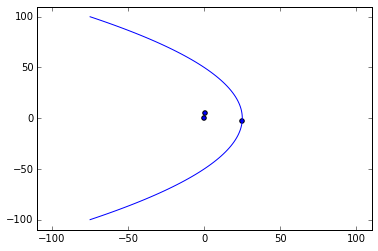

In [275]:
interact(plot_one_soln, soln=fixed(soln), j=(0,499), lim=(25,200,5));

In [276]:
def solve_all_stars(ics, icg, M, S, tmax, ntimes):
    solns = []
    for ic in ics:
        soln = solve_one_star(ic, icg, M, S, tmax, ntimes)
        solns.append(soln)
    return solns

In [277]:
solns = solve_all_stars(a, b, 1.0e11, 1.0e11, 10.0, 500)

Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.


In [278]:
def plot_all_solns(solns, j, lim):
    x = np.array([soln[j,0] for soln in solns])
    y = np.array([soln[j,1] for soln in solns])
    X = np.array([soln[j,4] for soln in solns])
    Y = np.array([soln[j,5] for soln in solns])
    plt.scatter(x, y,color='green')
    plt.scatter(X, Y,color='gold')
    plt.scatter(0,0)
    plt.plot(px,py)
    plt.xlim(-lim,lim)
    plt.ylim(-lim,lim);

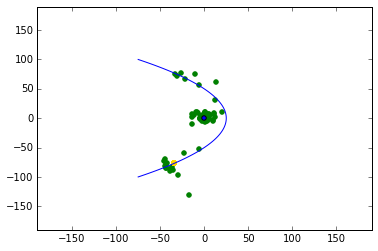

In [279]:
plt.figure(figsize=(6,6))
interact(plot_all_solns, solns=fixed(solns), j=(0,499), lim=(25,200,5));